# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
# !pip install numpy pandas matplotlib seaborn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/UTAustin # Drive mounting
filepath = '/content/drive/MyDrive/UTAustin/foodhub_order.csv' # Reading file based on path from Google Drive
df = pd.read_csv(filepath) # Loading file into a pandas dataframe

Mounted at /content/drive
foodhub_order.csv  Learner_Notebook_Full_Code.html


In [6]:
df.head(5) # First 5 rows of the dataframe

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
df.shape

(1898, 9)

#### Observations:
- There are a total of 1898 entries (rows/data points) with 9 columns (features) present in the dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- All 9 columns have a total of 1898 entries.
- There are 4 integer columns which are - order_id, customer_id, food_preparation_time and delivery_time.
- There are 4 object columns which are - restaurant_name, cuisine_type, day_of_the_week and rating.
- There is one feature of type float which is cost_of_the_order as its a price in USD.
- The object columns contain categories in them.
- The rating column - Has numeric values (5, 4, 3) and a string value of 'Not given', therefore all are represented as strings/objects.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
df.isnull().sum() # obtaining a total of the missing values in each column

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
- **No missing values** were identified as per the results provided below.
- Therefore, no null value treatments were optimised on the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [11]:
print("Minimum time taken for food preparation: "+ str(df.food_preparation_time.min())+ " minutes") # Minimum time taken to prepare food
print("Maximum time taken for food preparation: "+ str(df.food_preparation_time.max())+ " minutes") # Maximum time taken to prepare food
print("Average time taken for food preparation: "+ str(np.floor(df.food_preparation_time.mean()))+ " minutes") # Average time taken to prepare food

Minimum time taken for food preparation: 20 minutes
Maximum time taken for food preparation: 35 minutes
Average time taken for food preparation: 27.0 minutes


#### Observations:
- Minimum time taken for food preparation: 20 minutes
- Maximum time taken for food preparation: 35 minutes
- Average time taken for food preparation: 27 minutes (Majority of the orders are prepared within 27 minutes which almost half an hour)


### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [13]:
print("Total number of 'Not Given' ratings:", df['rating'].value_counts()['Not given'])

Total number of 'Not Given' ratings: 736


#### Observations:
- Total number of '**Not Given**' order ratings are 736.
- FoodHub must introduce perks and benefits given when an order is rated, this will encourage customers to rate their orders thus providing an insight into FoodHub's services and customer satisfaction levels.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

##### **Order ID & Customer ID**

In [14]:
df['order_id'].nunique()

1898

In [15]:
df['customer_id'].nunique()

1200

**Observations**
- There is a total of 1898 unique order IDs indicating this many orders were made over a period of time on FoodHub.
- There is a total of 1200 customers who have registered and made orders via FoodHub.


##### **Cost of Order**

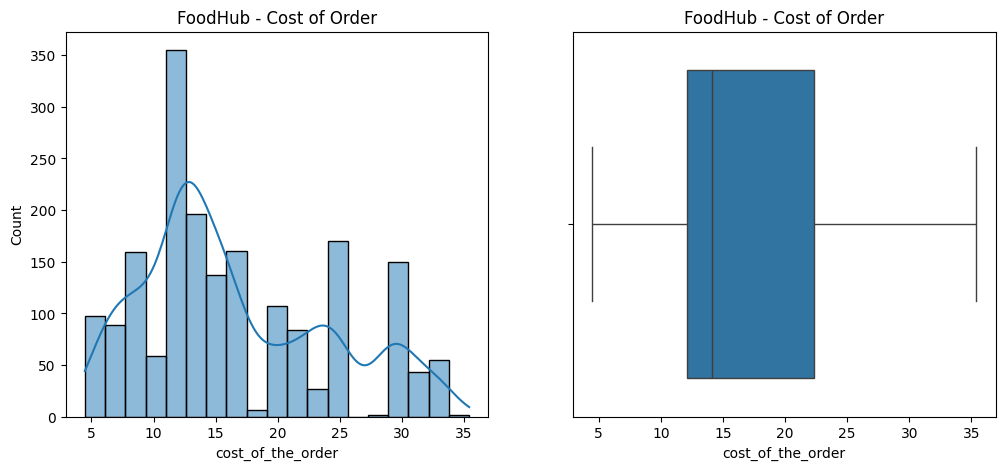

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)); # 1 row, 2 columns
sns.histplot(ax=axes[0], data=df, x='cost_of_the_order', kde=True); # KDE (Kernel Density Distribution) for data distribution analysis
axes[0].set_title('FoodHub - Cost of Order'); # Title of plot 1
sns.boxplot(ax=axes[1], data=df,  x='cost_of_the_order');
axes[1].set_title('FoodHub - Cost of Order'); # Title of plot 2
plt.show(); # Diplaying the plots

**Histogram Observations**

- The peaks indicates the cost of the orders are commonly between USD 11-14 (mode).
- The histogram is skewed to the right (positive skew).
- The mean is greater than the median due to the distribution being right-skewed.

**Box Plot Observations**
- The box plot does not have any outliers but is skewed to the right.
- The median in a boxplot indicates 50% of the orders placed are less than USD 14.

**Company Insights**
- Revenue is primarily generated from low-cost orders.
- Most customers purchase orders between USD 11-14, the peaks represent the most the customers are willing to spend which is typically USD 14 or less.
- Expensive orders are not frequently placed, therefore, the company must focus on the orders with the most sales and plan their inventory accordingly.
- The plots indicate that there is a customer segment wiling to pay more than USD 20.

##### **Delivery Time**

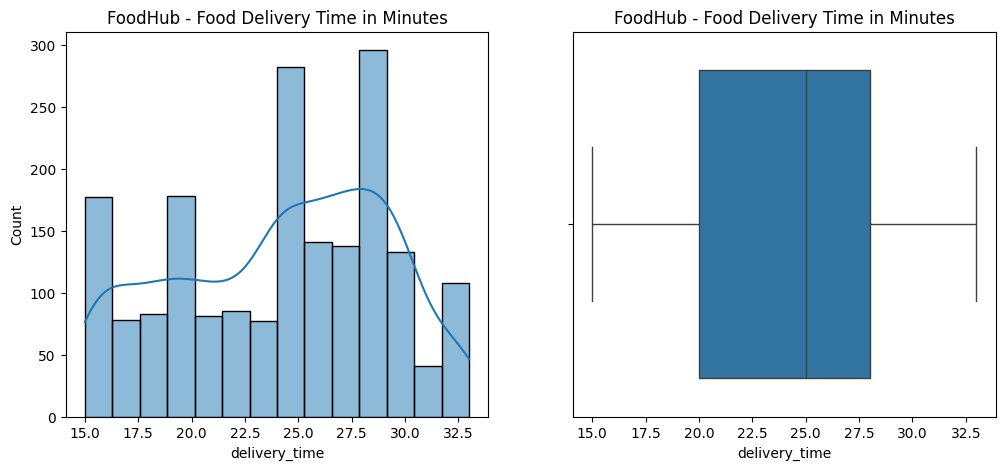

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5));
sns.histplot(ax=axes[0], data=df, x='delivery_time', kde=True);
axes[0].set_title('FoodHub - Food Delivery Time in Minutes');
sns.boxplot(ax=axes[1], data=df,  x='delivery_time');
axes[1].set_title('FoodHub - Food Delivery Time in Minutes');
plt.show();

**Histogram Observations**
- Presents a bimodal distribution with 2 distinct peaks at 24-25 and 27-29 minutes.
- Both peaks have more than 250 deliveries being made within the 24-29 minutes.

**Box Plot Observations**
- The delivery data is spread from 15 - 32 minutes.
- The box plot does not have any outliers meaning consistent deliveries, however the data is left skewed.
- The median suggests that 50% of orders are delivered within 25 minutes or less.

**Company Insights**
- Based on the peaks of 24-29 minutes for delivery, this could lead to food going cold, thus resulting in customer dissatisfaction and a poor brand image for FoodHub.
- FoodHub must take measures to deliver efficiently and within a 15 minute time span to prevent the above stated problem.

##### **Food Preparation Time**

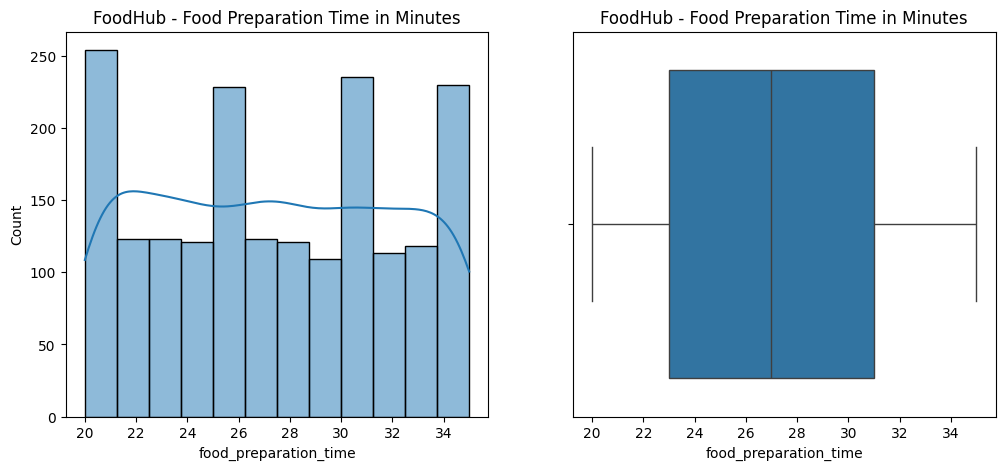

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5));
sns.histplot(ax=axes[0], data=df, x='food_preparation_time',kde=True);
axes[0].set_title('FoodHub - Food Preparation Time in Minutes');
sns.boxplot(ax=axes[1], data=df,  x='food_preparation_time');
axes[1].set_title('FoodHub - Food Preparation Time in Minutes');
plt.show();

**Histogram Observations**
- The data follows a multimodal distribution presenting more than 1 peak suggesting different preparation times appear often (multiple modes).
- The peaks have more than 200 orders each made within 20 minutes, 26 minutes, 30 - 31minutes and 34 minutes.
- The highest peak is in 20mins with more than 250 orders prepared.

**Box Plot Observations**
- The plot demonstrates a symmetric distribution with 50% of the food prepared between 26 - 28 minutes.
- The plot does not display any unusual preparation times (outliers).

**Company Insights**
- The preparation time fluctuates most likely due to the type of orders a customer places. As bigger orders require a longer preparation time.
- However, if the waiting period exceeds, an auto-generated discounts or perks should be provided due to the company's miscalculation of the waiting period.

##### **Popular Restaurants**

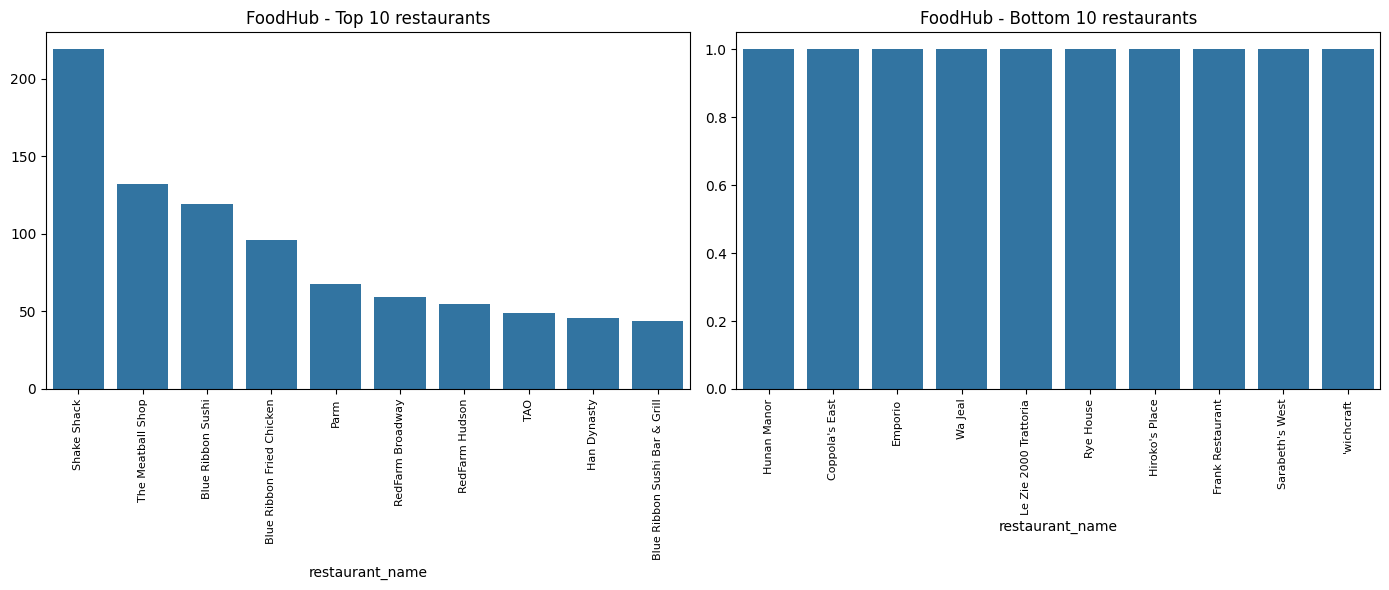

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6));
top_10 = df['restaurant_name'].value_counts().head(10);
sns.barplot(ax=axes[0], x=top_10.index, y=top_10.values);
axes[0].set_title('FoodHub - Top 10 restaurants');
axes[0].tick_params(axis='x', rotation=90, labelsize=8)  # Label customization in the graphs
bottom_10 = df['restaurant_name'].value_counts().tail(10);
sns.barplot(ax=axes[1], x=bottom_10.index, y=bottom_10.values);
axes[1].set_title('FoodHub - Bottom 10 restaurants');
axes[1].tick_params(axis='x', rotation=90, labelsize=8) # Label customization in the graphs
plt.tight_layout()
plt.show()

**Bar Plot Observations**
- The plots depict the top 10 popular restaurants and the bottom 10 restaurants in New York.
- The restaurant with the highest number of orders via FoodHub is Shake Shack with more than 200 orders placed.
- The bottom 10 restaurants receive either 1 or no orders via FoodHub.

**Company Insights**
- FoodHub's main source of income is from Shake Shack, The Meatball Shop and Blue Ribbon Sushi with more than 100 orders each.
- FoodHub must take measures to market the low-tier restaurants to generate more orders thus generating more profit for FoodHub.

##### **Types of Cuisines**

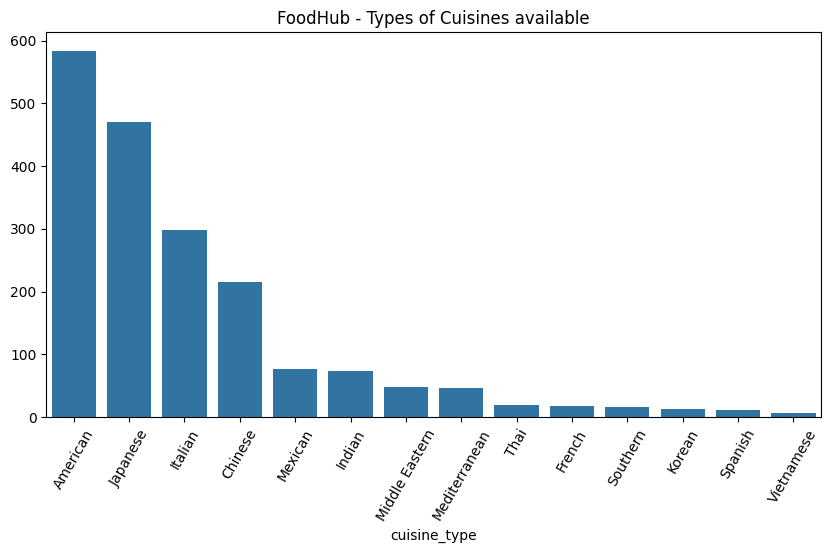

In [20]:
top_10_cuisines = df['cuisine_type'].value_counts();
plt.figure(figsize=(10, 5))
cuisine_barplot = sns.barplot(x=top_10_cuisines.index, y=top_10_cuisines.values);
cuisine_barplot.set_title('FoodHub - Types of Cuisines available');
cuisine_barplot.tick_params(axis='x', rotation=60)
plt.show()


**Bar Plot Observations**
- Based on the Barplot, the most popular type of cuisines among FoodHub users are American followed by Japanese, Italian and Chinese cuisines with each more than 200 orders placed via FoodHub.
- The least popular are Vietnamese, Spanish, Korean, Southern, French and Thai with less than 50 orders.
- Therefore, the most reveneue generated for FoodHub is from the top 4 cuisines.

**Company Insights**
- FoodHub offers a range of 14 types of cuisines.
- Due to most of income from the top 4 cuisines (American, Japanese, Italian and Chinese), the company could focus on promoting the least popular cuisines by adding more dishes or altering the menu to suit the customer base while simultaneuously doing the same to the most popular cuisines. This would in turn increase the order count and profilt for FoodHub.

##### **Day of the Week**

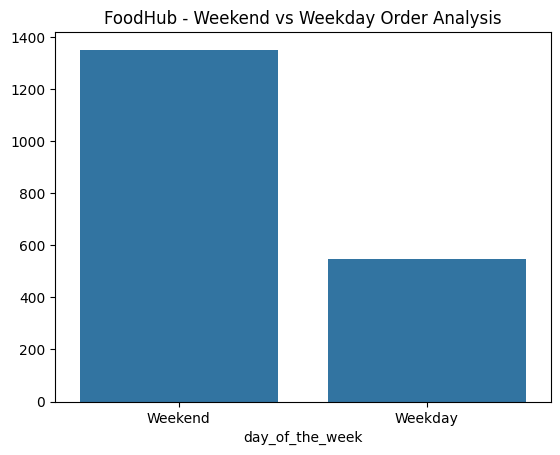

In [21]:
dayOfTheWeek_ValueCounts = df['day_of_the_week'].value_counts();
dayOfTheWeek = sns.barplot(x=dayOfTheWeek_ValueCounts.index, y=dayOfTheWeek_ValueCounts.values);
dayOfTheWeek.set_title('FoodHub - Weekend vs Weekday Order Analysis');
plt.show()

**Bar Plot Observations**
- Based on the visual provided, majority of the orders are placed during the weekend indicating these are busiest days for the FoodHub staff members with close to 1400 orders (More profit).
- The least amount of orders are made during the 5 weekdays.

**Company Insights**
- Low number of orders during the weekday could be due to FoodHub's long delivery and food preparation timeframes, as NYC is populated with busy and working individuals who avoid ordering food due to timed lunch breaks.
- Due to lower orders placed during the weekdays, the company could introduce more discounts, faster deliveries, benefits and deals such as 'Buy 1 get 1 free' motivating the consumers to purchase more on weekdays.
- Enforcing the above perks could generate more sales thus more profit for FoodHub.

##### **Rating**

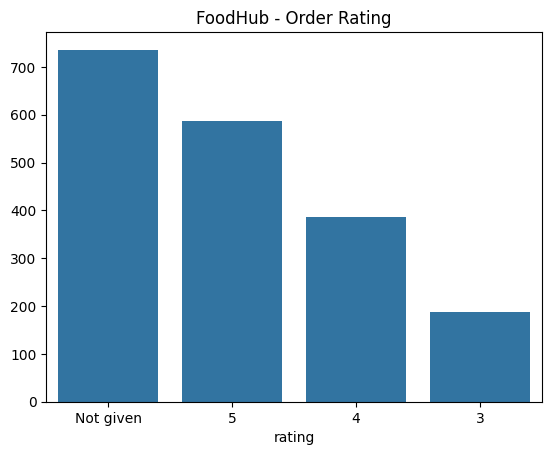

In [22]:
rating_value_counts = df['rating'].value_counts();
rating = sns.barplot(x=rating_value_counts.index, y=rating_value_counts.values);
rating.set_title('FoodHub - Order Rating');
plt.show()

**Bar Plot Observations**
- Based on the barchart provided above, more than 700 orders are not rated.
- Close to 600 orders obtain a 5 star rating while less than 400 orders receive 4 or low.

**Company Insights**
- To improve customer interactions and obtain customer feedbacks, the company could introduce loyalty benefits and rewards. Ex - With every feedback, a customer is rewarded with a set of points which can be used to lower prices on future orders.
- Enforcing this will positively affect the company allowing FoodHub to build a more stronger and loyal customer base.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

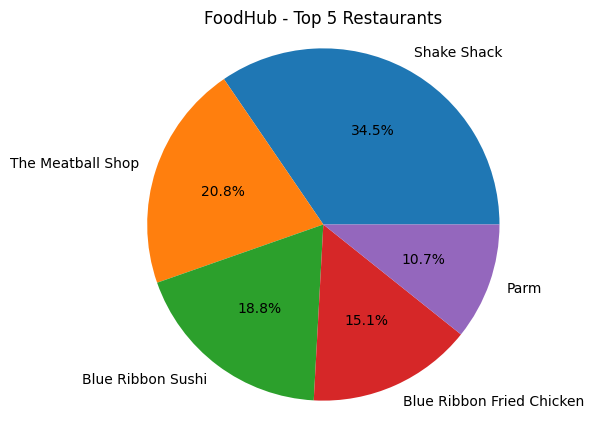

In [23]:
top_5_restaurants = df['restaurant_name'].value_counts().head(5); # Obtaining the top 5 restaurants
plt.figure(figsize=(5, 5))
plt.pie(top_5_restaurants.values, labels=top_5_restaurants.index, autopct='%1.1f%%') # Autopct adds the percentages for each slice in a pie chart
plt.title('FoodHub - Top 5 Restaurants')
plt.axis('equal')  # Equal indicates the pie will be drawn as a circle
plt.show()

In [24]:
print("The top 5 restaurants as per the chart are:\n")
for i, (restaurant_name, orders) in enumerate(top_5_restaurants.items()):
  print(str(i+1) + ". " +str(restaurant_name) + " : " + str(orders) + ' orders')
  print('---------------------------------------------')

The top 5 restaurants as per the chart are:

1. Shake Shack : 219 orders
---------------------------------------------
2. The Meatball Shop : 132 orders
---------------------------------------------
3. Blue Ribbon Sushi : 119 orders
---------------------------------------------
4. Blue Ribbon Fried Chicken : 96 orders
---------------------------------------------
5. Parm : 68 orders
---------------------------------------------


#### Observations: Top 5 Restaurants with the highest number of orders

1. Shake Shack : 219 orders (34.5%)
2. The Meatball Shop : 132 orders (20.8%)
3. Blue Ribbon Sushi : 119 orders (18.8%)
4. Blue Ribbon Fried Chicken : 96 orders (15.1%)
5. Parm : 68 orders (10.7%)

#### Company Insights
- Listed above are the top 5 restaurants across NYC generating more profit for FoodHub.
- FoodHub must carry out an analysis on why these are customer favourites on various aspects such as:-
  - Varieties on the menu
  - Cost of the food
  - Covenient location
- This would help FoodHub to compare with the low-tier restaurants and make decisions and insights for future partnerships and current partnership renewals.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

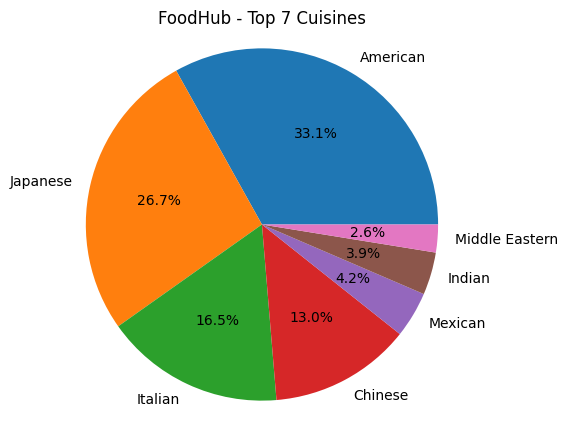

In [25]:
weekend_cuisine = df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(7); # Obtaining the top 7 cuisines in the weekend
plt.figure(figsize=(5, 5))
plt.pie(weekend_cuisine.values, labels=weekend_cuisine.index, autopct='%1.1f%%') # Autopct adds the percentages for each slice in a pie chart
plt.title('FoodHub - Top 7 Cuisines')
plt.axis('equal')  # Equal indicates the pie will be drawn as a circle
plt.show()

In [26]:
print('The most popular cuisine during the weekend is:', weekend_cuisine.idxmax()) # idxmax returns the label of the first occurance

The most popular cuisine during the weekend is: American


#### Observations:
- The most popular cuisine on FoodHub among New Yorkers during the weekend is American (33.1%).

#### Company Insights
- FoodHub could launch more varieties of American cuisines as this is a customer favourite cuisine thus enhancing existing menus.
- Introduce discounts and offers on weekends.
- Implementing the above could result in more profit and expand the existing customer base on a variety of American cuisines (Positive word of mouth).

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
percentage = np.floor(((df['cost_of_the_order']>20).mean())*100).astype(int)
print('Orders costing more than USD 20 is '+ str(percentage)+"%")

Orders costing more than USD 20 is 29%


#### Observations:
- Orders costing more than USD 20 on FoodHub is 29%
- This indicates that only a niche segment of consumers are willing to splurge more than USD 20 on FoodHub.
- 71% of orders are placed below USD 20 indicating this is the most consumers on FoodHub are willing to spend.

#### Company Insights
- FoodHub must focus on low-priced dishes and lauch more cuisines that are within the range of USD 20 as 71% of customers are willing to spend only this much on orders.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
mean_delivery_time = df['delivery_time'].mean()
print("Mean order delivery time:", np.floor(mean_delivery_time).astype(int), 'minutes') #np.floor() was optimised to round the number and astype int to obtain an interger value

Mean order delivery time: 24 minutes


#### Observations:
- The average delivery time for orders on FoodHub is 24 minutes indicating majority of the orders are delivered in 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

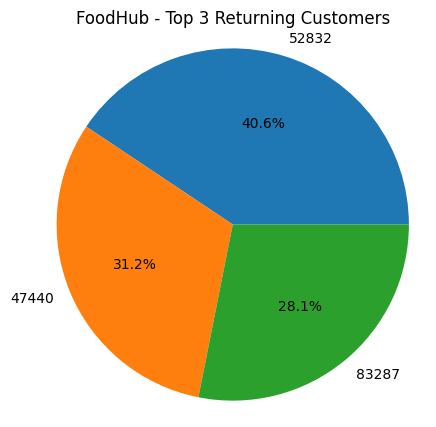

In [29]:
top_3_customers = df['customer_id'].value_counts().head(3); # Obtaining the 3 customers with the most number of orders
plt.figure(figsize=(5, 5))
plt.pie(top_3_customers.values, labels=top_3_customers.index, autopct='%1.1f%%') # Autopct adds the percentages for each slice in a pie chart
plt.title('FoodHub - Top 3 Returning Customers')
plt.axis('equal')  # Equal indicates the pie will be drawn as a circle
plt.show()

In [30]:
print("The top 3 customers as per the chart are:\n")
for i, (customer_id_name, order_count) in enumerate(top_3_customers.items()):
  print(str(i+1) + ". CID " +str(customer_id_name) + " : " + str(order_count) + ' orders')
  print('---------------------------')

The top 3 customers as per the chart are:

1. CID 52832 : 13 orders
---------------------------
2. CID 47440 : 10 orders
---------------------------
3. CID 83287 : 9 orders
---------------------------


#### Observations: Top 3 returning customers on FoodHub qualifying for the 20% discount
- **CID 52832** : 13 orders
- **CID 47440** : 10 orders
- **CID 83287** : 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### **Exploratory Data Analysis - Numerical to Numerical**

#### **Multivariate EDA - Numerical to Numerical**

##### **Heat Map Visualization**

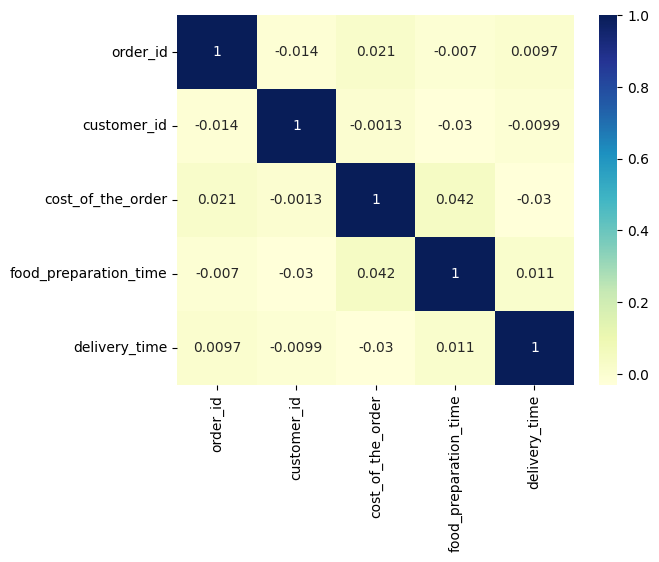

In [31]:
num_var = df.dtypes[df.dtypes != 'object'].index # Extracting only numerical columns from the dataframe
sns.heatmap(data=df[num_var].corr(), annot=True, cmap='YlGnBu');

**HeatMap Observations**
- A heatmap was optimised to visualise the correlation strength between the data present in the dataset.
- Based on the visual:-
  - Highest correlation is 0.042 (cost_of_the_order & food_preparation_time)
  - The highest positive correlation is 0.042 (cost_of_the_order & food_preparation_time)
  - The highest negative correlation is -0.0013 ( customer_id & cost_of_order)
- There is a relatively weak positive correlation of 0.011 between food_preparation_time & delivery_time (The bigger the order, the longer the delivery time as cautiously loading the food may take a while and driving to the destination attentively without the food being muddled)
- A negative correlation of -0.03 is depicted between the cost_of_the_order and delivery_time which is illogical as the cost_of_order elongates the food_preparation_time which results in a longer delivery_time for loading large orders.
- The strongest positive correlation of 0.042 is identified between cost_of_the_order and food_preparation_time as discussed in the former point.

##### **Scatterplot Observation**

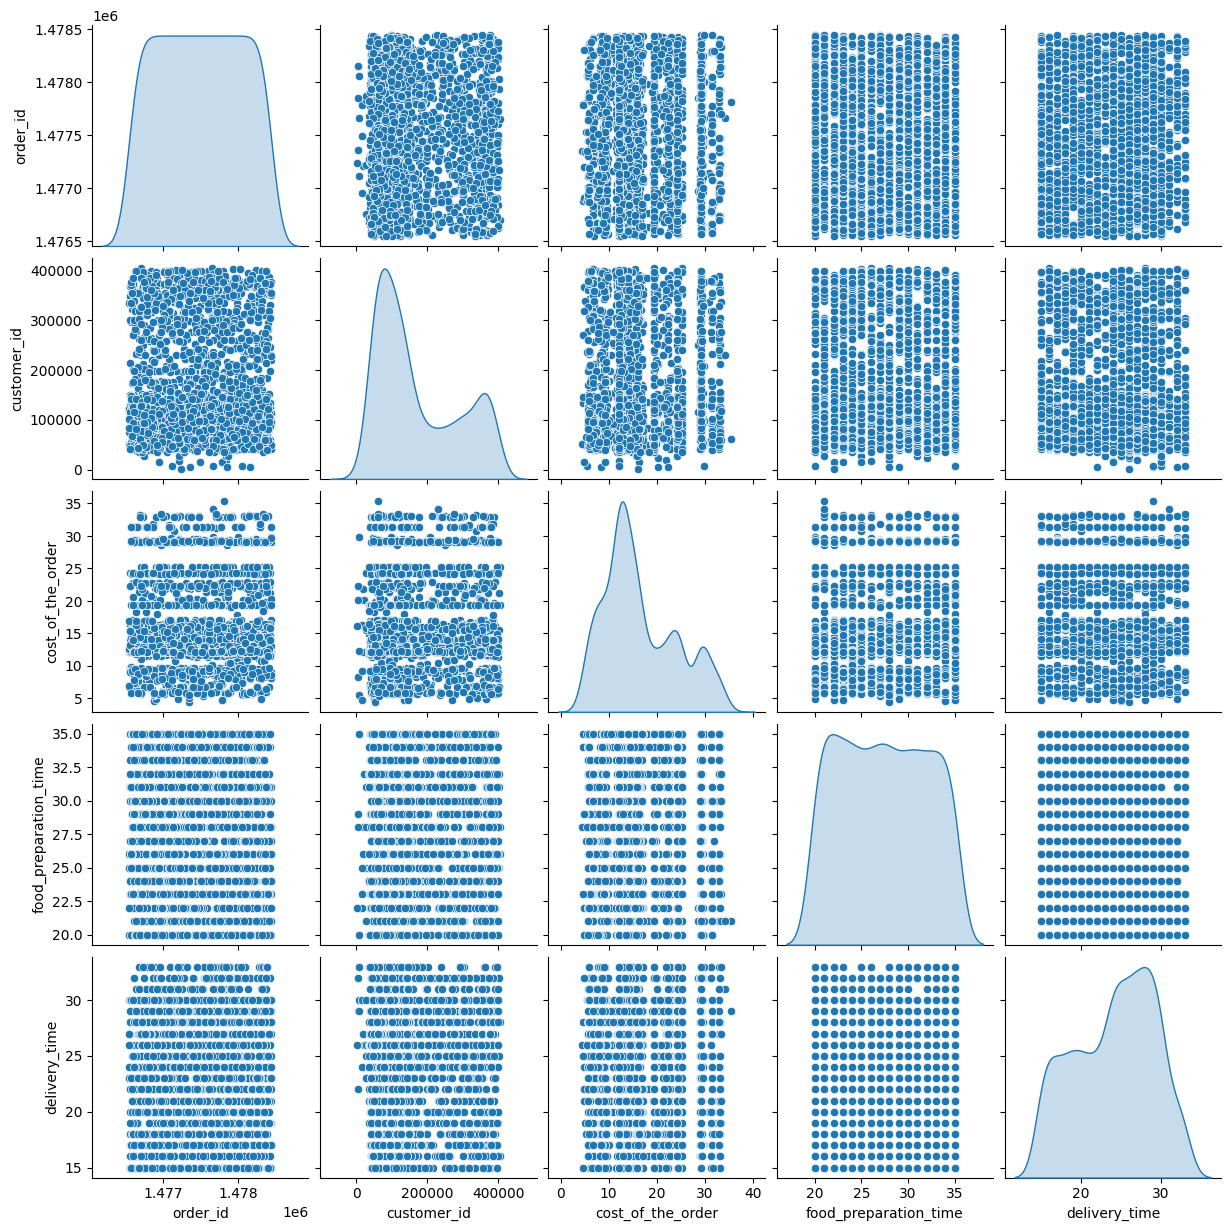

In [32]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Scatter Plot Observations**
- Between the different features in the dataset, no correlation is identified unless the features are checked for correlation with themselves.
- Therefore, same insights as per the heatmap are observed but visually.

#### **Bivariate EDA - Numerical to Numerical**

##### **Customers with 5+ orders**

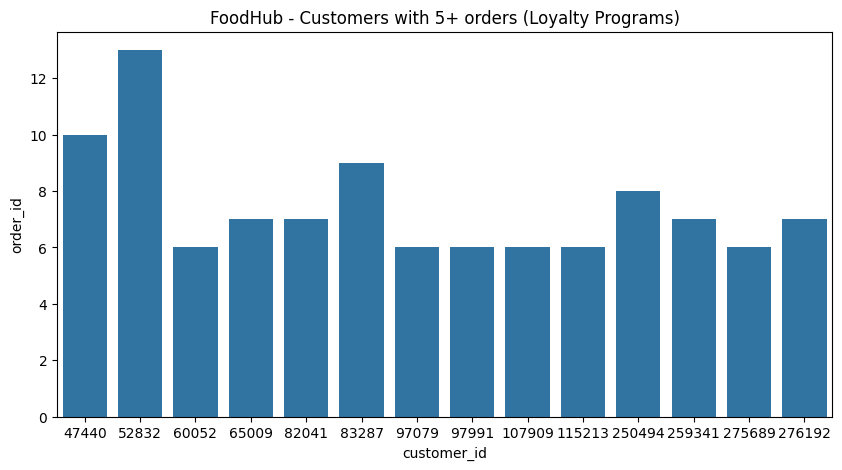

In [33]:
total_customer_orders = df.groupby('customer_id')['order_id'].count().reset_index()
plus10_orders = total_customer_orders[total_customer_orders['order_id']>5]
plt.figure(figsize=(10, 5))
plot = sns.barplot(x=plus10_orders['customer_id'], y=plus10_orders['order_id']);
plot.set_title('FoodHub - Customers with 5+ orders (Loyalty Programs)');
plt.show();

**Bar Plot Observations**
- The bar plot generated above indicates the customers who have placed more than 5 orders with FoodHub.

**Company Insights**
- FoodHub could introduce Loyalty Programs, discounts on the next orders or other perks to show the company's appreciation and ensure these customers return thus resulting in a positive word of mouth.


##### **Customers who spend more than USD 120**

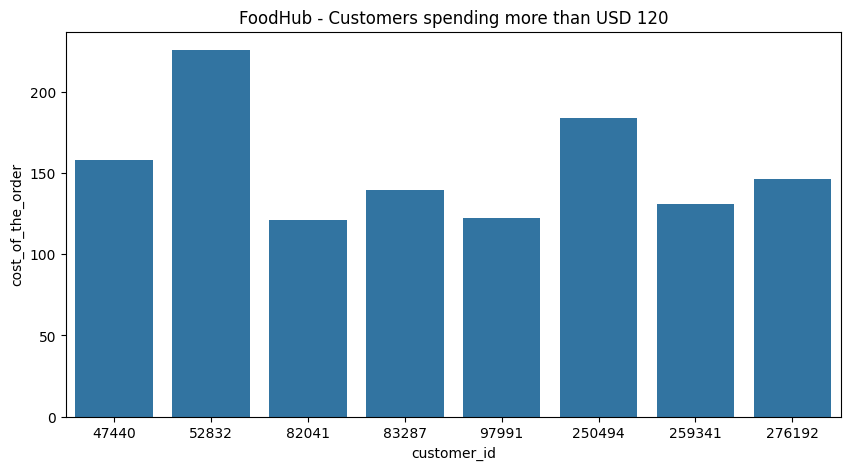

In [34]:
total_customer_cost_of_orders = df.groupby('customer_id')['cost_of_the_order'].sum().reset_index()
plus10_orders = total_customer_cost_of_orders[total_customer_cost_of_orders['cost_of_the_order']>120]
plt.figure(figsize=(10, 5))
plot = sns.barplot(x=plus10_orders['customer_id'], y=plus10_orders['cost_of_the_order']);
plot.set_title('FoodHub - Customers spending more than USD 120');
plt.show();

**Bar Plot Observations**
- The plot above depicts the customers who have spent more than USD 120 on FoodHub which are quiet a few compared to large number of consumers registered on the application (discussed in the intial cells).

**Company Insights**
- FoodHub could introduce discounts or free delivery options for orders more than a particular threshold which will motivate the customer to spend more and ensure FoodHub gets a positive word of mouth.

##### **Rating vs Delivery Time**

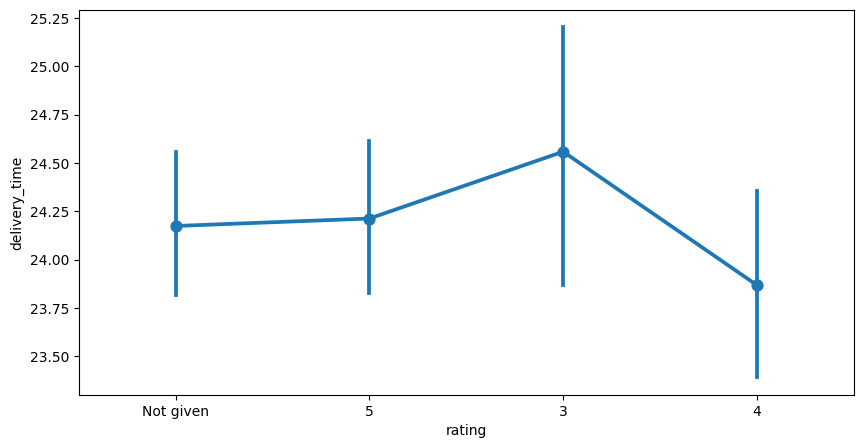

In [35]:
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

**Point Plot Observations**
- The point plot above visualizes the delivery time with contrast to ratings.
- The sooner an order is delivered, a higher rating of 4 or 5 is given by the customer. All the orders are delivered before 25 mintues.
- Delayed orders suggest the customers are unhappy with the order thus a rating of 3 is provided. Error bars extend from 23 to 25 minutes indicating the delivery times for orders with poor ratings.

**Company Insights**
- Faster deliveries obtain higher ratings of 4 or 5 meaning the customers are satisfied.
- Customer rates drop to 3 when the orders are delivered after 24 minutes.
- FoodHub must take measures to ensure the delivery of the orders are done carefully and on time.

##### **Delivery distribution time between orders**

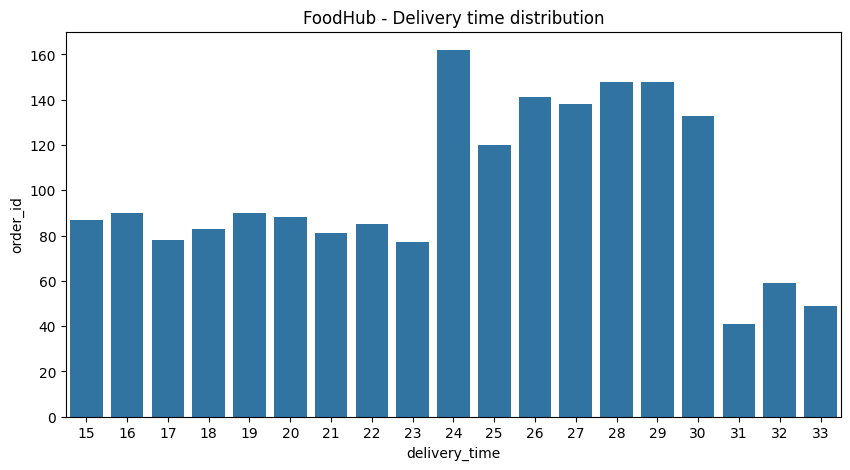

In [36]:
order_time = df.groupby('delivery_time')['order_id'].count().reset_index()
plt.figure(figsize=(10, 5))
plot = sns.barplot(x=order_time['delivery_time'], y=order_time['order_id']);
plot.set_title('FoodHub - Delivery time distribution');
plt.show();

**Bar Plot Observations**
- The plot above presents the amount of orders which are delivered in the given time periods with most orders delivered within 24 minutes.

**Company Insights**
- Most orders are delivered within 24 minutes however majority of the remaining orders are delivered after 24 minutes which could lead to a negative word of mouth and customer dissatisfaction.
- FoodHub must take measures to automate apologies and provide discounts if an order exceeds a threshold of 15 minutes and make the app more Consumer Friendly.

#### **Bivariate EDA - Numerical to Categorical**

##### **Restaurant and Revenue Generated**

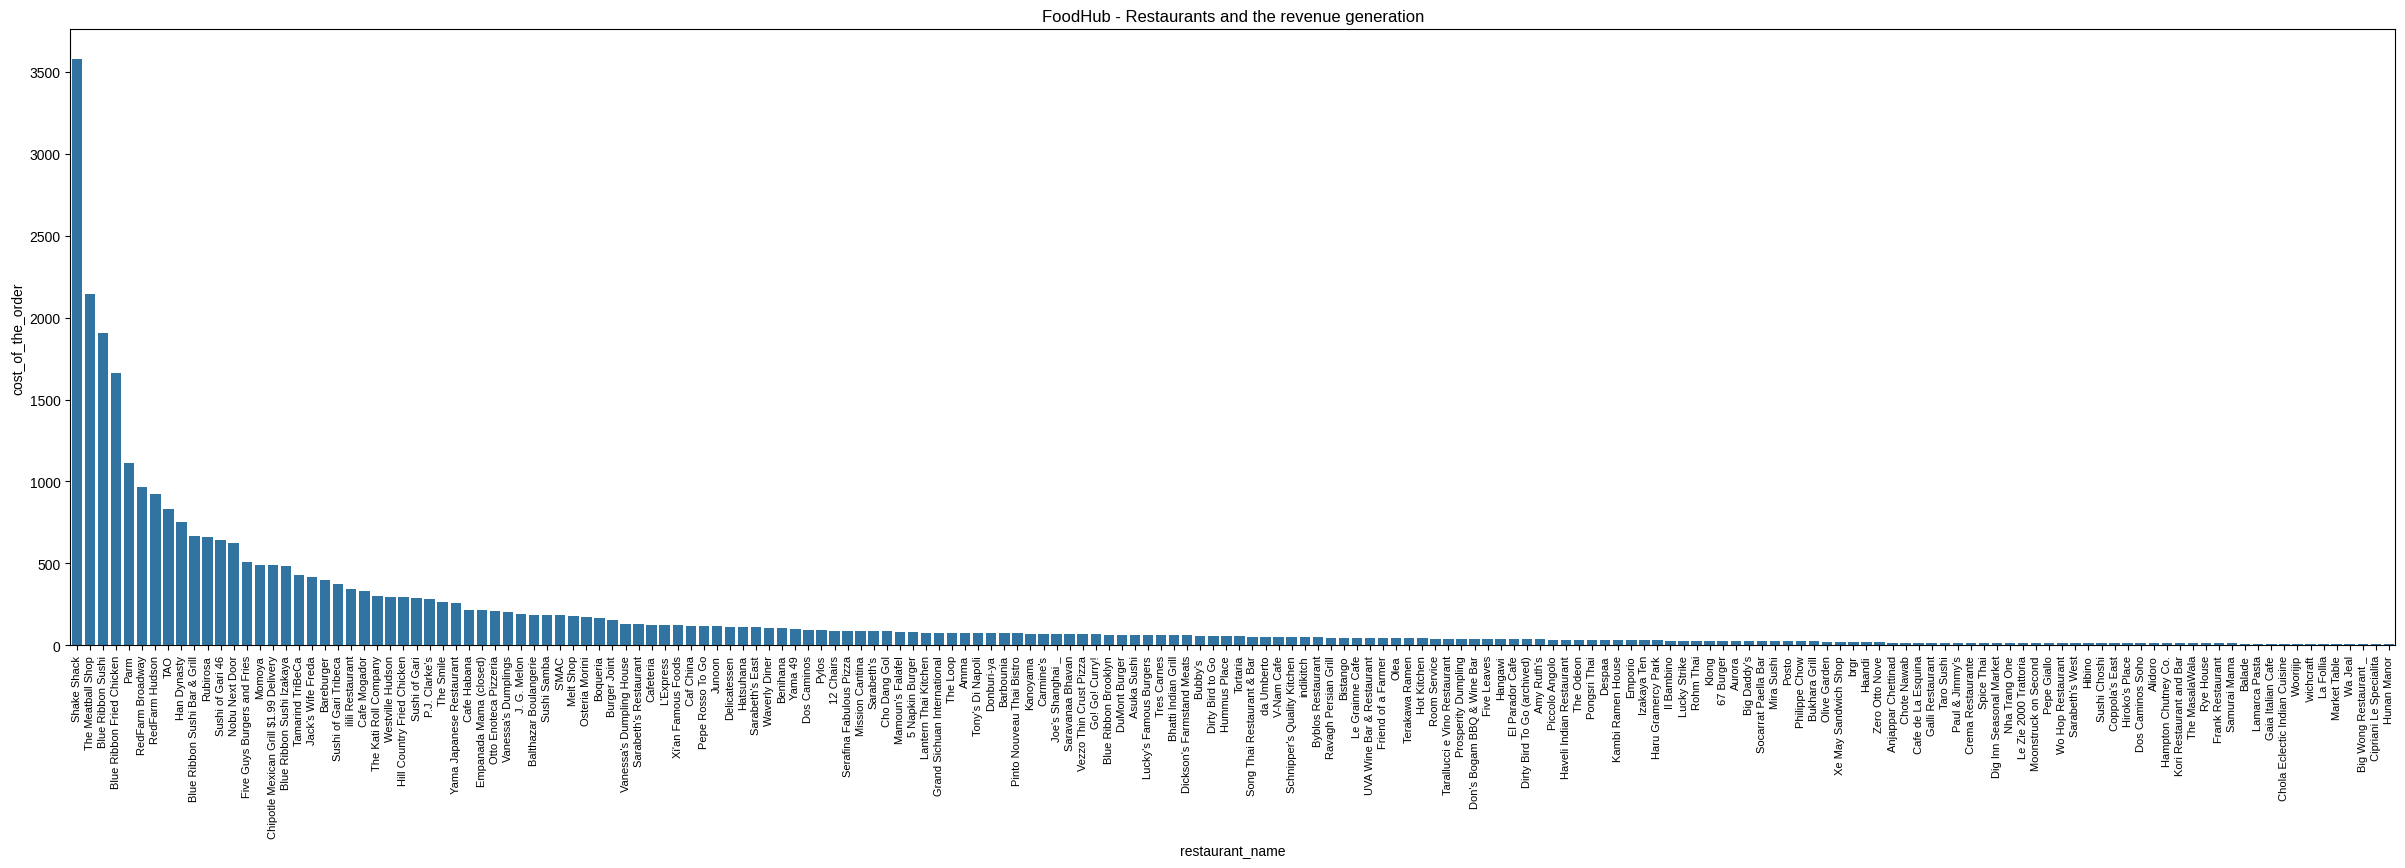

In [37]:
plt.rcParams['font.sans-serif'] = ['Arial', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
df['restaurant_name'] = df['restaurant_name'].str.encode('ascii', errors='ignore').str.decode('ascii') # Error identified due to special characters in the restaurant names (underscores) hence the code to prevent it

restaurant_revenue = df.groupby('restaurant_name')['cost_of_the_order'].sum().reset_index()
restaurant_revenue_distribution = restaurant_revenue.sort_values('cost_of_the_order', ascending=False)
plt.figure(figsize=(30, 8))
plot = sns.barplot(x=restaurant_revenue_distribution['restaurant_name'], y=restaurant_revenue_distribution['cost_of_the_order'])
plot.set_title("FoodHub - Restaurants and the revenue generation")
plot.tick_params(axis='x', rotation=90, labelsize=8)
plt.show()

**Bar Plot Observations**
- The plot above presents the restaurants available on Foodhub and the revenues each restaurant generated for the company.
- 'ShakeShack' solely generated a total profit of more than USD 3500 (before discounts and tax deductions) while 'The Meatball Shop' generated a revenue of more than USD 2000.

**Company Insights**
- Due to the ShakeShack, The Meatball Shop and the Blue Ribbon Sushi generating a significant cashflow of over USD 1500, FoodHub could enhance the menus to promote new dishes and attract a much larger consumer base than the current.
- For the restaurants generating a profit of less than USD 500, the company must re-evaluate their partnerships with these restaurants due to costly markerting campaigns required to improve their sales (Liability).

##### **Restaurant vs Average Rating**

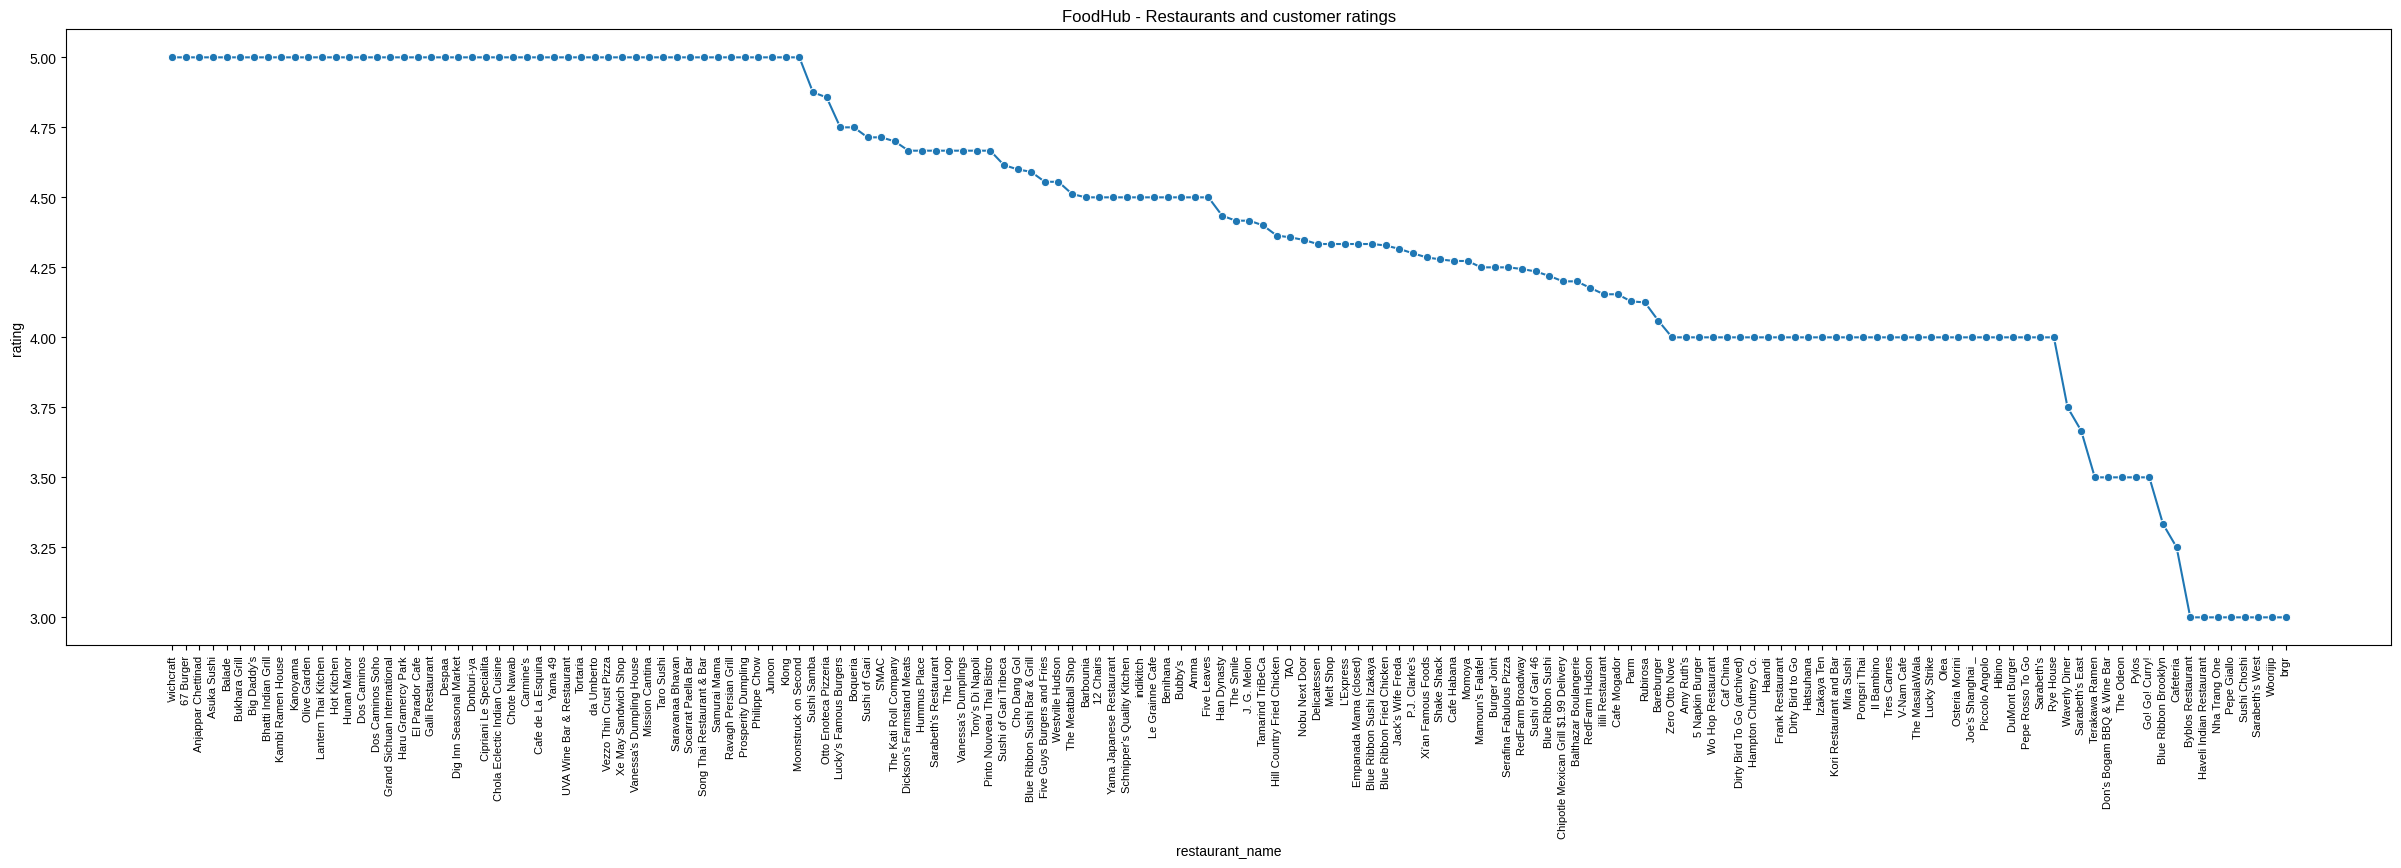

In [38]:
restaurant_df = df[df['rating'] != 'Not given'].copy() # Remove of the 'Not Given' value from the column to obtain the ratings per restaurant
restaurant_df['rating'] = restaurant_df['rating'].astype(int) # Converting values to integer as they were formally in data type object
restaurant_ratings = restaurant_df.groupby('restaurant_name')['rating'].mean().reset_index()
restaurant_ratings = restaurant_ratings.sort_values('rating', ascending=False)
plt.figure(figsize=(30, 8))
plot = sns.lineplot(x=restaurant_ratings['restaurant_name'], y=restaurant_ratings['rating'], marker='o')
plot.set_title("FoodHub - Restaurants and customer ratings")
plot.tick_params(axis='x', rotation=90, labelsize=8)
plt.show()

**Line Plot Observations**
- The line plot presents the average rating received by restaurants on FoodHub.
- Many restaurants obtain a 5 star rating while some with significantly low as 3 stars.

**Company Insights**
- For the restaurants with less than 4 star rating indicates that these are not customer favourites on FoodHub.
- FoodHub must focus primarily on customer spending patterns, therefore partnerships with restaurants with lower ratings as 3 stars must be terminated as they do not contribute to the income much.

##### **Cusine vs Cost of Order / Rating**

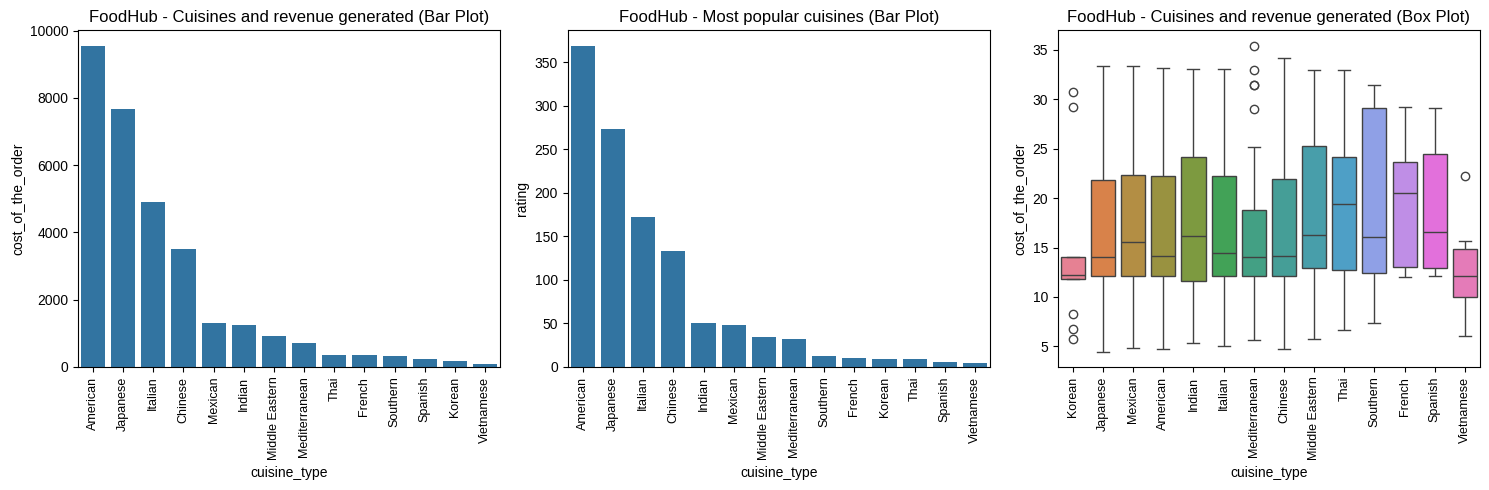

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)); # 1 row, 2 columns

# Plot 1 - Cuisine Type and Revenue Generated
cuisine_revenue = df.groupby('cuisine_type')['cost_of_the_order'].sum().reset_index()
cuisine_revenue = cuisine_revenue.sort_values('cost_of_the_order', ascending=False)
sns.barplot(ax=axes[0], x=cuisine_revenue['cuisine_type'], y=cuisine_revenue['cost_of_the_order'])
axes[0].set_title("FoodHub - Cuisines and revenue generated (Bar Plot)")
axes[0].tick_params(axis='x', rotation=90, labelsize=9)

# Plot 2 - Weekend vs Weekday Revenue
cuisine_df = df[df['rating'] != 'Not given'].copy() # Remove of the 'Not Given' value from the column to obtain the ratings per restaurant
cuisine_df['rating'] = cuisine_df['rating'].astype(int) # Coverting values to integer as they were formally in data type object
cuisine_ratings = cuisine_df.groupby('cuisine_type')['rating'].count().reset_index() # Total count of ratings obtained by each cuisine
cuisine_ratings = cuisine_ratings.sort_values('rating', ascending=False)
sns.barplot(ax=axes[1], x=cuisine_ratings['cuisine_type'], y=cuisine_ratings['rating'])
axes[1].set_title("FoodHub - Most popular cuisines (Bar Plot)")
axes[1].tick_params(axis='x', rotation=90, labelsize=9)

sns.boxplot(ax=axes[2], x = "cuisine_type", y = "cost_of_the_order", data = df, hue = "cuisine_type")
axes[2].set_title("FoodHub - Cuisines and revenue generated (Box Plot)")
axes[2].tick_params(axis='x', rotation=90, labelsize=9)

plt.tight_layout() # Prevents the plots from overlapping
plt.show();

**Bar Plot Observations (Cuisine and Revenue Generated)**
- The barplots indicate the revenue generated from cusines and the most popular cuisines on FoodHub in terms of the average rating provided by consumers.
- The cuisines with more than a total profit of USD 6000 are American and Japaneese, indicating the favourties among New Yorkers with both more than 250 ratings each.
- The least liked cuisines in New York are Vietnameese generating less than USD 500 and ratings less than 50 as per the graph.

**Box Plot Observations (Cuisine and Revenue Generated)**
- Depicts the average spending per cuisine by New Yorkers on FoodHub.
- Despite Amercain and Japanese being customer favourites, there are cusines with consumers spending more than the average such as French cuisines.

**Company Insights**
- The plots above suggest which of the cuisines contribute significantly to the company's sales.
- Mediterranean and Korean cuisines indicate that there is a niche customer segment willing to spend more than USD 30 despite the average spending being less than USD 15.
- The cuisines with higher median on cost of order are Thai, French and Indian meaning these cuisines suggest a higer profit is obtained from each order (Expanding menus by adding more varieties for these cuisine types would greatly benefit increasing sales for FoodHub).

##### **Day of the week vs Cost of Order**

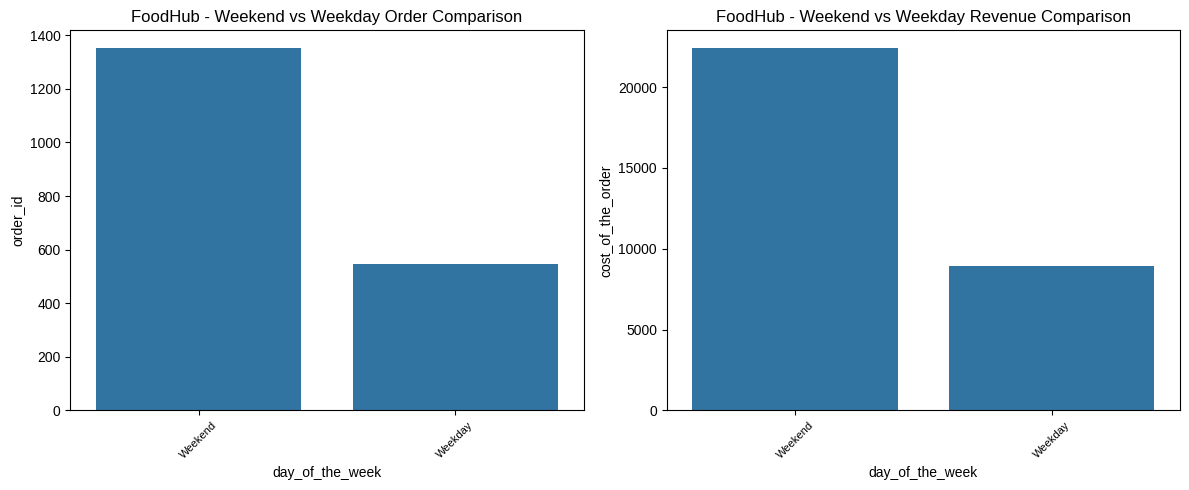

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)); # 1 row, 2 columns

# Plot 1 - Weekend vs Weekday Order Count
order_week = df.groupby('day_of_the_week')['order_id'].count().reset_index()
order_week = order_week.sort_values('order_id', ascending=False)
sns.barplot(ax=axes[0], x=order_week['day_of_the_week'], y=order_week['order_id'])
axes[0].set_title("FoodHub - Weekend vs Weekday Order Comparison")
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

# Plot 2 - Weekend vs Weekday Revenue
order_week = df.groupby('day_of_the_week')['cost_of_the_order'].sum().reset_index()
order_week = order_week.sort_values('cost_of_the_order', ascending=False)
plot = sns.barplot(ax=axes[1], x=order_week['day_of_the_week'], y=order_week['cost_of_the_order'])
axes[1].set_title("FoodHub - Weekend vs Weekday Revenue Comparison")
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout() # Prevents the plots from overlapping
plt.show()

**Bar Plot Observations**
- Most orders are placed during the weekend with more than 1300 orders therefore the revenue made during the weekend is more than USD 20,000.
- Weekdays are the least active for FoodHub in New York for orders with only 500 orders and a profit of less than USD 10,000.

**Company Insights**
- The above results for less orders on weekdays could be due to New Yorkers being busy and as FoodHub takes quiet a while to deliver (ranging from 24 to 30 minutes), many are reluctant to order as this clashes with their working hours.

##### **Restaurants with the fastest delivery times**

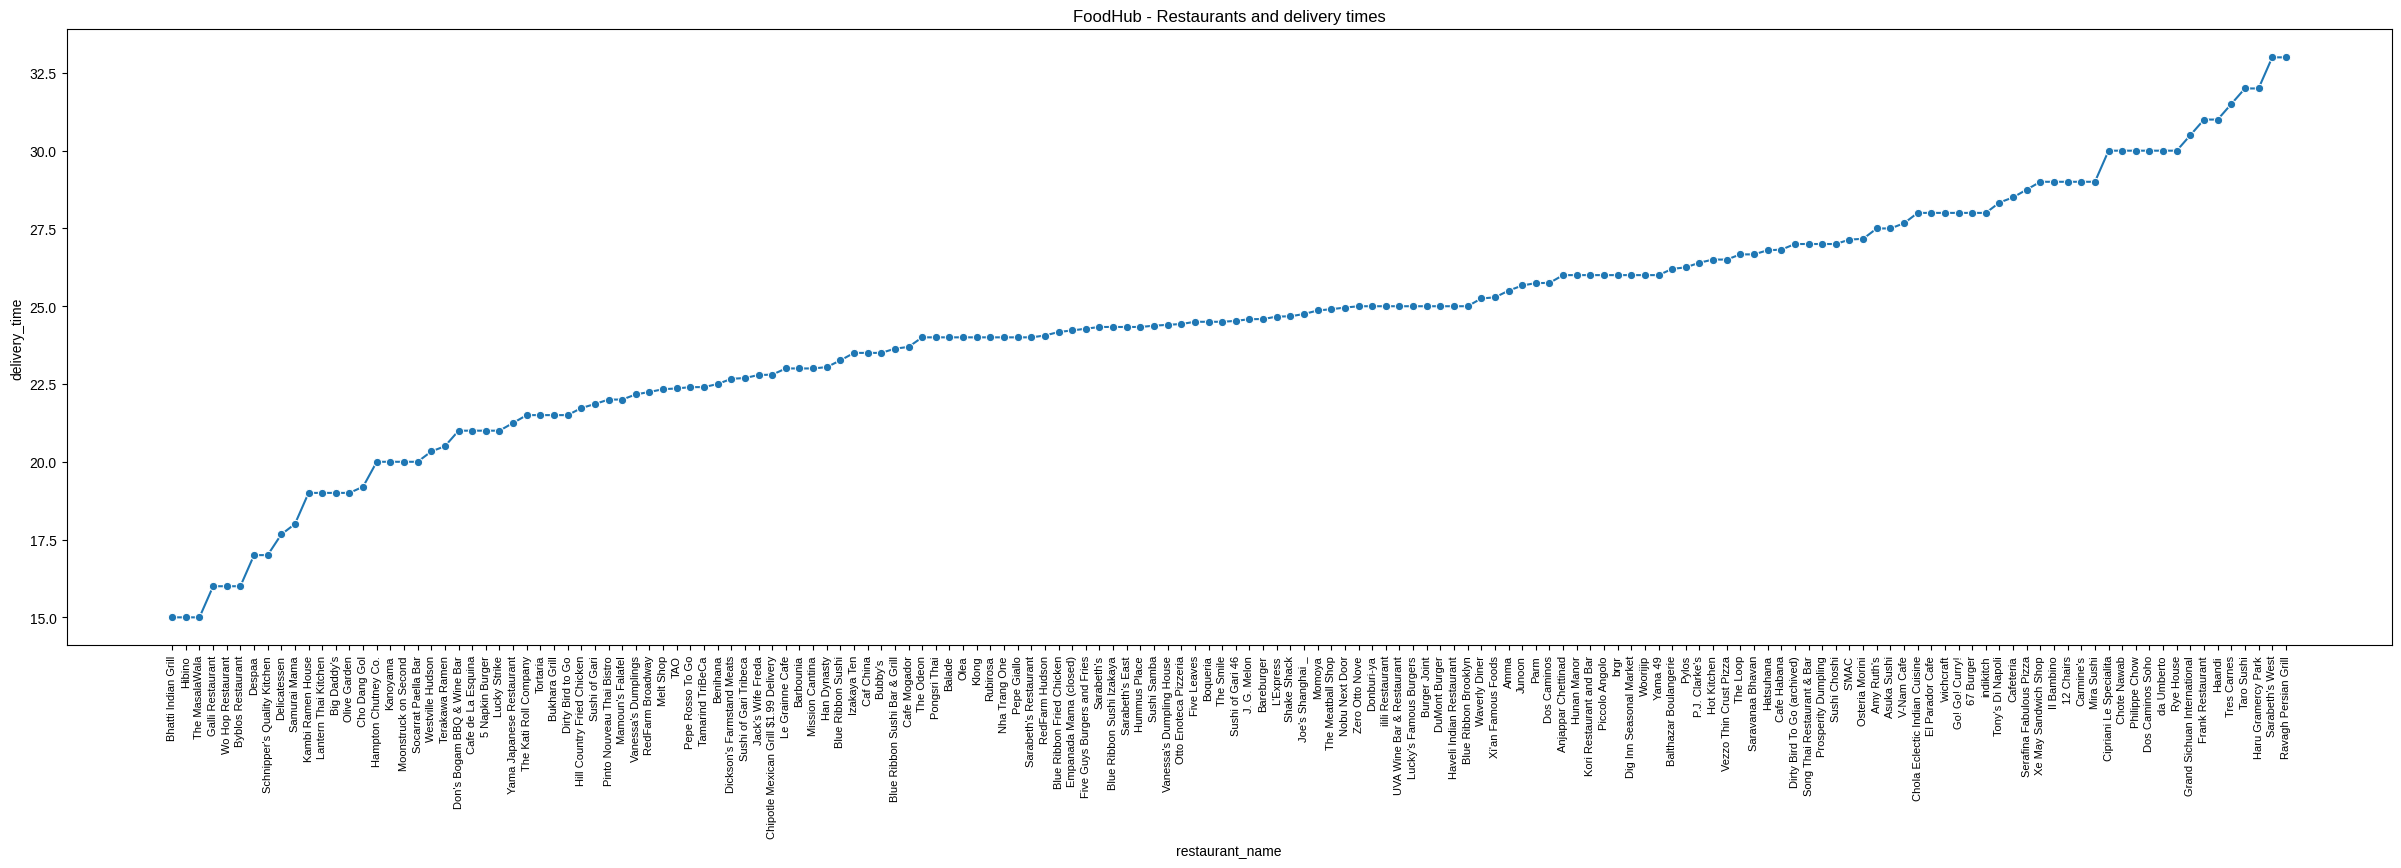

In [41]:
restaurants = restaurant_df.groupby('restaurant_name')['delivery_time'].mean().reset_index()
restaurants = restaurants.sort_values('delivery_time', ascending=True)
plt.figure(figsize=(30, 8))
plot = sns.lineplot(x=restaurants['restaurant_name'], y=restaurants['delivery_time'], marker='o')
plot.set_title("FoodHub - Restaurants and delivery times")
plot.tick_params(axis='x', rotation=90, labelsize=8)
plt.show()

In [42]:
restaurants.head(5)

,restaurant_name,delivery_time
13,Bhatti Indian Grill,15.0
61,Hibino,15.0
131,The MasalaWala,15.0
52,Galli Restaurant,16.0
145,Wo Hop Restaurant,16.0


In [43]:
restaurants.tail(5)

,restaurant_name,delivery_time
137,Tres Carnes,31.5
127,Taro Sushi,32.0
58,Haru Gramercy Park,32.0
113,Sarabeth's West,33.0
103,Ravagh Persian Grill,33.0


**Line Plot Observations**
- The top restaurants with their delivery times ranging from 15 to past 32 minutes are plotted for observations.
- The top 5 restaurants are provided with each a delivery time of 16 minutes or less.
- The bottom 5 restaurants with the slowest delivery times are provided.

**Company Insights**
- FoodHub must carry out an analysis to identify ways to bring the delivery times of other popular restaurants down to 15-16 minutes.
- Launch marketing campaigns for the fastest delivery restaurants to improve their order count especially during the weekday as they have faster deliveries meaning busy New Yorkers can benefit during the weekday from these restaurants.
- The graph above allows FoodHub to make decisions in terms of the convenience of the restaurant's location and where their customers are located.

##### **Bivariate EDA - Categorical to Categorical**

#####**Day of the week vs Cuisine Type**

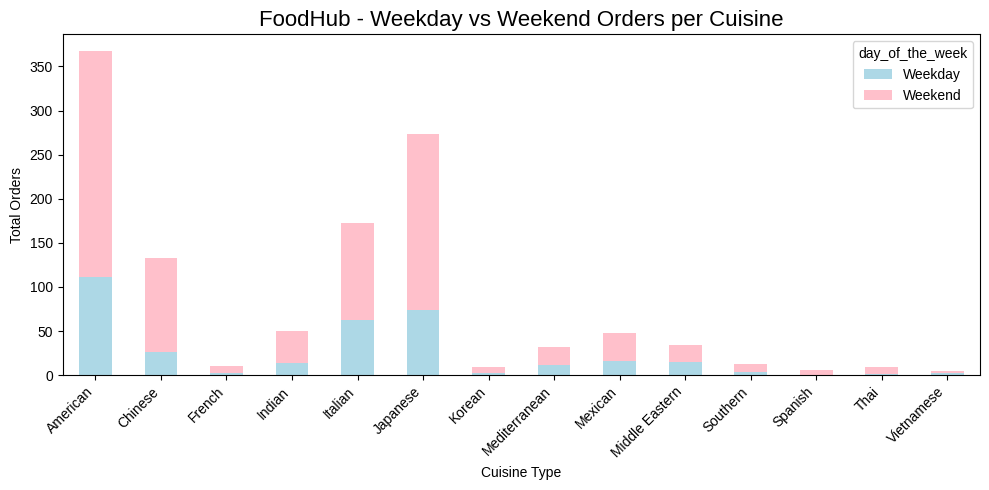

In [44]:
grouped_data = restaurant_df.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='total_orders')
pivot = grouped_data.pivot(index='cuisine_type', columns='day_of_the_week', values='total_orders')

# Plot
ax = pivot.plot.bar(stacked=True, color=['lightblue', 'pink'], figsize=(10, 5))
ax.set_title('FoodHub - Weekday vs Weekend Orders per Cuisine', fontsize=16)
ax.set_ylabel('Total Orders')
ax.set_xlabel('Cuisine Type')
ax.set_xticklabels(pivot.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Stacked Bar Plot Observations**
- The plot depicts the type of cuisine and when they are frequently ordered.
- Some cuisines such as Spanish cuisines are ordered only during the weekend with less than 50 orders.
- The most common weekday cuisine is American with more than 200 orders.

**Company Insights**
- Introduce offers for popular cuisines (American, Japanese, Italian) during the weekdays to test the performance and observe the impact on revenue and to identify if customers will yet purchase these when offers are promoted during the weekday. This would help campaing the cuisines better and allow FoodHub to understand why they are popular during the weekends and not weekdays.
- Assess the cuisines with low orders (Thai, Spanish, Vietnamese) and conduct marketing campaigns to see if this improves sales for such cuisines (Provides insights on decision making for partnerships for FoodHUb).

#####**Busiest days for Restaurants**

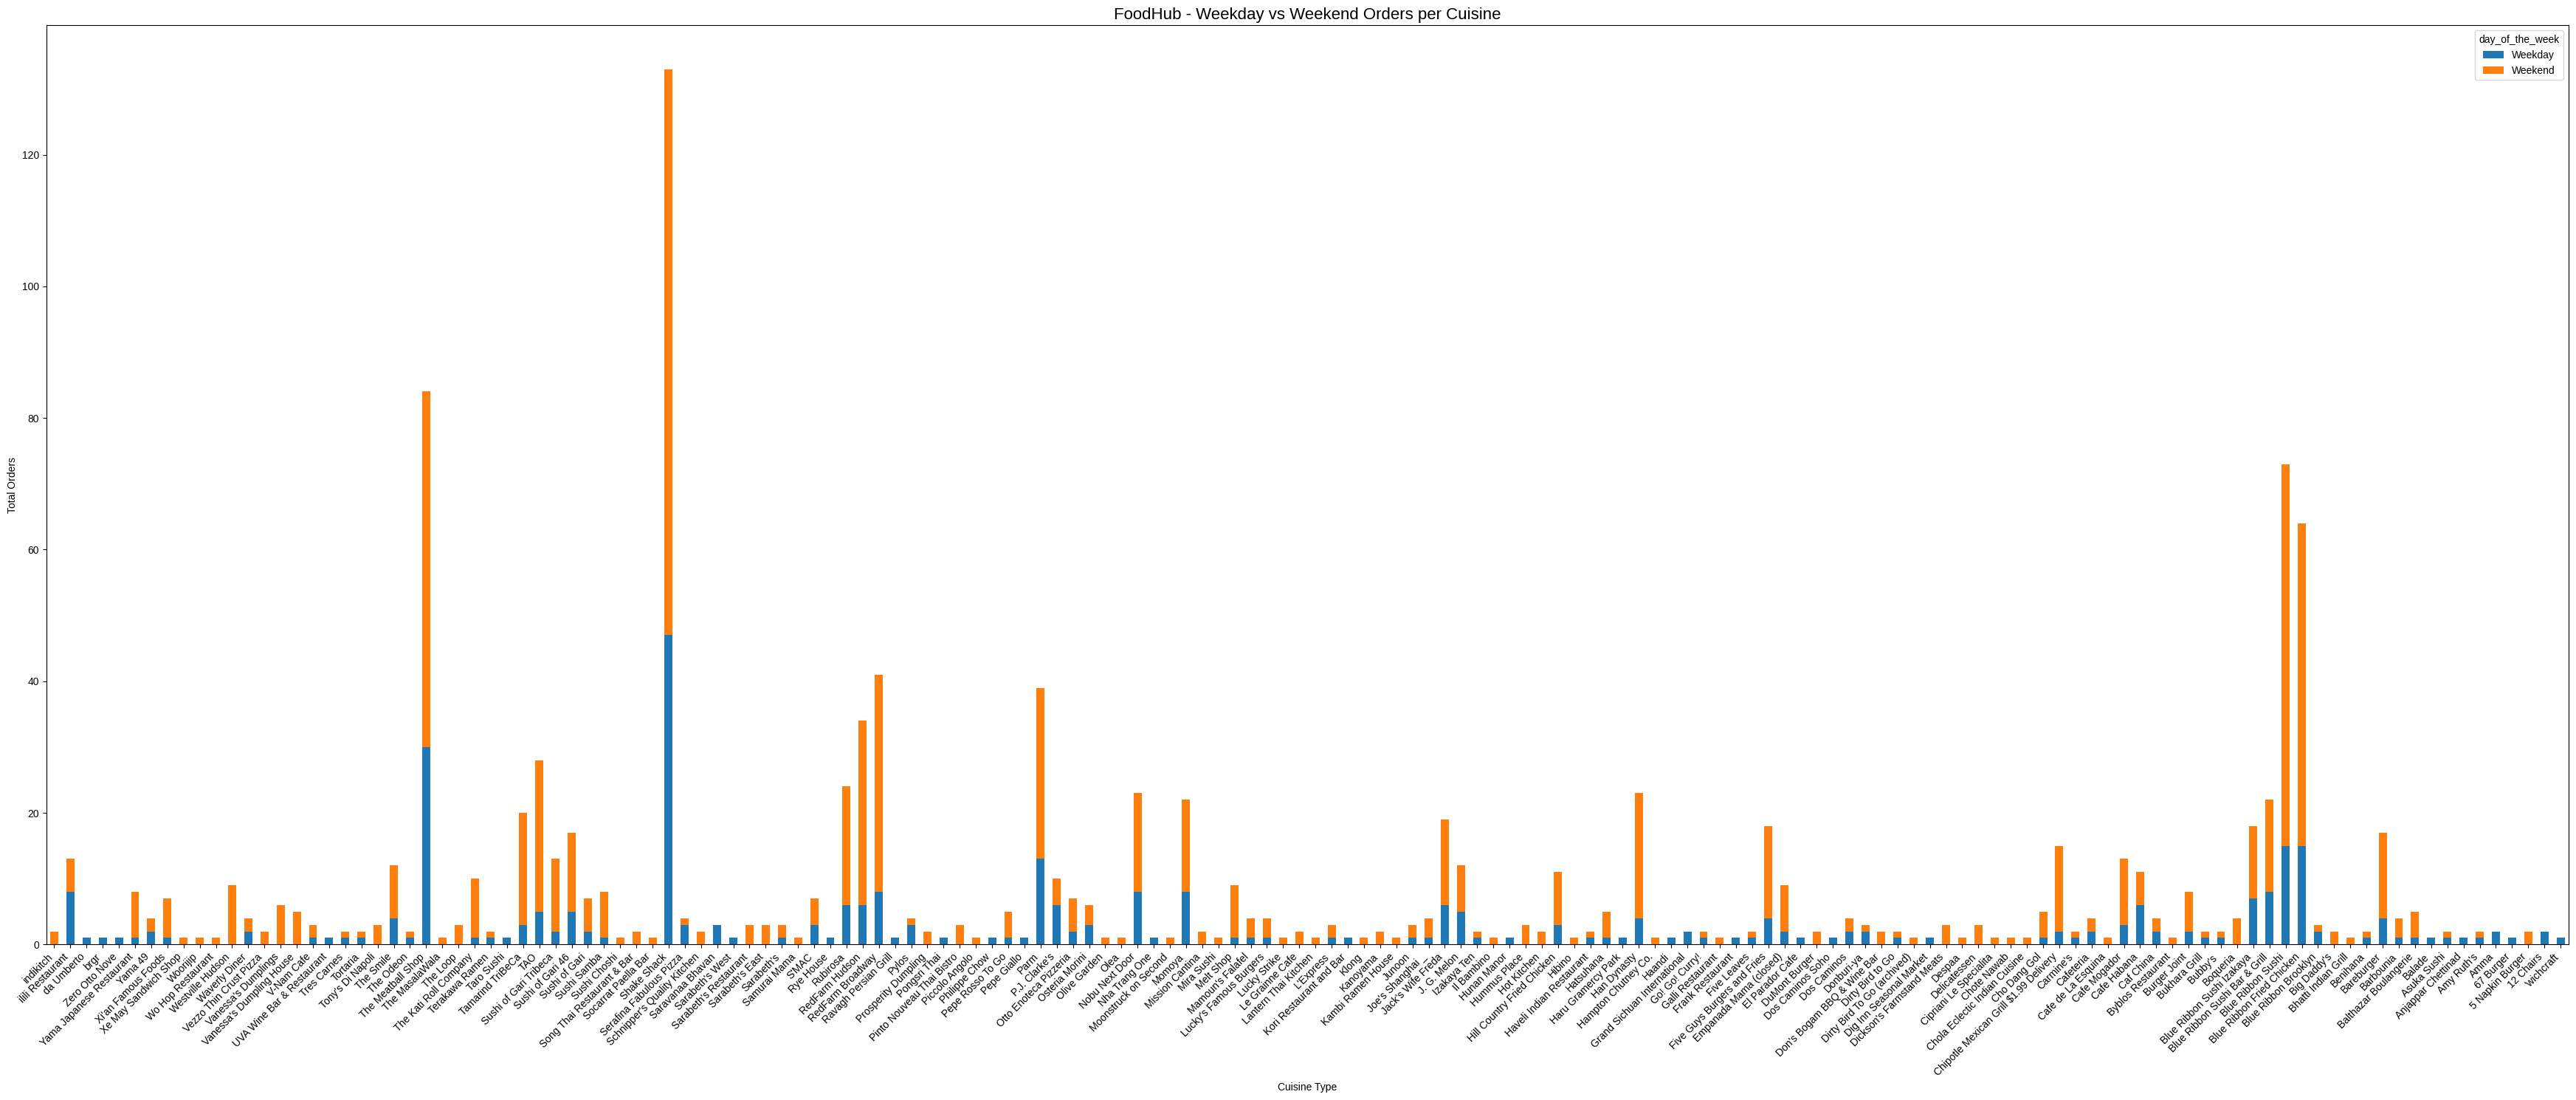

In [45]:
grouped_data = restaurant_df.groupby(['restaurant_name', 'day_of_the_week']).size().reset_index(name='total_orders')
pivot = grouped_data.pivot(index='restaurant_name', columns='day_of_the_week', values='total_orders').sort_values('restaurant_name', ascending=False)

ax = pivot.plot.bar(stacked=True, figsize=(35, 15))
ax.set_title('FoodHub - Weekday vs Weekend Orders per Cuisine', fontsize=16)
ax.set_ylabel('Total Orders')
ax.set_xlabel('Cuisine Type')
ax.set_xticklabels(pivot.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Stacked Bar Plot Observations**
- The plot depicts the restaurants that are considerably busy with more than 100 orders during the weekend which are Shake Shack, Meatball Shop, Rubirosa, Redfarm Hudson, Redfarm Broadway, Parm etc.
- Restaurants busy during the weekday are ilili, wichcraft and 12 chairs.

**Company Insights**
- FoodHub must ensure restaurants busiest during the week/weekend must have a faster and smoother delivery with quick preparation times for customer satisfaction.
- Analysis on restaurants with high orders during the week/weekend must be evaluated and resources (delivery drivers) must be allocated efficiently.
- Analysis on why some restaurants are popular among New Yorkers during the weekday must be carried out (location convenience, faster deliveries etc)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [46]:
promotional_offer_restaurants = df[df['rating'] != 'Not given'].copy()
promotional_offer_restaurants['rating'] = promotional_offer_restaurants['rating'].astype(int)
promotional_offer_restaurants = promotional_offer_restaurants.groupby('restaurant_name')['rating'].agg(['count', 'mean']).query('count > 50 & mean > 4').sort_values('count', ascending=False)
promotional_offer_restaurants

,count,mean
restaurant_name,,
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905
Blue Ribbon Sushi,73,4.219178
Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
- The restaurants with an average rating of more than 4 and a count of more than 50 are:-
  1. Shake Shack
  2. The Meatball Shop
  3. Blue Ribbon Sushi
  4. Blue Ribbon Fried Chicken

Therefore, the presented top 4 restaurants qualify for the promotional offer.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [47]:
total_sum = 0

for index, row in df.iterrows(): # Iterating through each row in the cost_of_the_order column
  price = row['cost_of_the_order']

  if(price > 20):
    price_after_discount = price - (price * 0.25) # calculating the discount and deducting it from the original price
    total_sum = price_after_discount + total_sum
  elif(price > 5):
    price_after_discount = price - (price * 0.15) # calculating the discount and deducting it from the original price
    total_sum = price_after_discount + total_sum

print("Total after discounts:", np.floor(total_sum))

Total after discounts: 25105.0


#### Observations:
- The net profit obtained from all the 1898 orders is USD 25,105.
- Expensive orders have a higher commission for FoodHub as they charge 25% on such orders.
- Cheaper orders of USD 4 or less do not have a charge while a USD of more than 5 have a commission of 15%.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [48]:
df['total_time_minutes'] = df['food_preparation_time'] + df['delivery_time']
percentage = (df['total_time_minutes'] > 60).mean()*100
print('Percentage of orders taking more than 60 minutes to be delivered:', str(percentage.round(2))+'%')

Percentage of orders taking more than 60 minutes to be delivered: 10.54%


#### Observations:
- 10.54% of the orders taken more than 60 minutes from preparation to delivering to the customers.

#### Company Insights:
- 10.54% of orders take more than an hour is taken to deliver them, this could result in customer dissatisfaction and poor reviews due to tardy deliveries and cold food.
- FoodHub must update customers with realistic delivery times to avoid customer dissapointment or inform the customer if delivery will surpass 1 hour.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [49]:
weekday_delivery_time = df.groupby(['day_of_the_week'])['delivery_time'].mean().astype(int)
weekday_delivery_time

,delivery_time
day_of_the_week,
Weekday,28
Weekend,22


#### Observations:
- The delivery time for the weekday is 28 minutes
- The delivery time for the weekend is 22 minutes

#### Company Insights:
- The observations above indicate the deliveries during the weekdays are much slower in comparison to the weekend deliveries.
- Weekday deliveries take upto 28 minutes (almost half an hour) to reach its destination, this could be due to the traffic and busy streets of NYC. *This could be the reason why Weekdays are less popular for placing orders on FoodHub*.
- The weekend mean delivery time is much faster and orders are delivered in 22 minutes (This could be due to less traffic during the weekend) thus indicating why many orders are placed during the weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Analysis was conducted on the New York FoodHub dataset with 1898 entries. Based on the in-depth analysis conducted, the features showed no signs of correlation present when examined with each other therefore, all features were given equal importance and inspected thoroughly individually and collectively.

- The total Net Revenue of FoodHub is more than USD 25,000.
    - Revenue is primarily obtained from low-cost orders.
- The most popular New York restaurant among FoodHub users is Shake Shack.
- A customer favourite cuisine is of type American on FoodHub.
- FoodHub is considerably occupied during the weekend as most orders are placed only then and a few during the weekdays.
- Average delivery time of FoodHub orders to reach its target customer is 24 minutes.
- Order costs on Foodhub range from USD 4 to USD 35.
- An average of USD 16-20 is all a New Yorker is willing to spend however, there is a group of consumers willing to spend more than USD 30.
- Ratings by customers fluctuate based on the delivery times of the restaurant (negative relationship as longer delivery times receive low ratings and vice versa).
- Weekday deliveries (28 minutes) are comparatively slower to weekend deliveries (22 minutes) this indicates why FoodHub users place more orders during the weekend and less orders during the weekday.

### Recommendations:
-  Introduce loyalty programs for returning customer and customers who spend more than the average spending.
- New delicacies and seasonal delicacies should be added to the menu to enhance and provide a variety to the existing customer base and not just the current 14 types of cuisines (Ex- Turkish Cuisines or more Asian cuisines due to New York being one of the most diverse cities in America and more than 67% of the population are Asians). These newly added cuisines must be within the range the majority in NYC are willing to spend (USD 4 to USD 35) thus generating more sales and revenue.
- FoodHub must promote the less popular restaurants and cusines, if the result is negative, partnerships with such restaurants is recommened to be terminated as this appears to be more of an expense and a liability to FoodHub.
- FoodHub must preserve the partnerships with restaurants that sell the most popular cuisines around NYC, this will help generate more profit.
- FoodHub could carry out a survey and identify where customer interests lie, their cuisine types and recommendations of their favourite restaurants which are currently not available in the app (more partnerships for FoodHub).
- Ensure faster deliveries on both weekdays and weekends as residents of NYC operate on a tight schedule especially during the weekday.
- Lastly, the data provided is insufficient and must be expanded to provide more insights on customer demographics and more details about the order placed (item count, price per item, type of food - sweet or spicy)